# How Not To Put A Nation To Sleep
## Blake Whittington and Gabriele Spiridaviciute
***
## Are People a Good Judge of Their Own Sleep and Health?

### General Analysis of American Sleep and Health Ratings
Now that we have a clean dataset with 1000 surveyors, we want to do some general analysis to see how people rate their health and sleep.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Parameters
Here we will load in the files needed in our notebook.<br>
This particular parameter contains the directory of the clean version of our 2013 "Health and Sleep" Sleep Foundation Survey

In [2]:
clean_2013_POLLDATASET =  '../data_file/cleaned_data_csv/clean_2013_POLLDATASET.csv'

## Load Cleaned Dataset
Our raw data is in CSV format so we will use the Pandas .read_csv()

In [3]:
clean_2013Poll = pd.read_csv(clean_2013_POLLDATASET)

## Examine Contents of Our Clean Dataset
We want to ensure that the csv file was read in correctly.<br>
We will print the data frame and its unique columns available

In [4]:
display(clean_2013Poll)
print(clean_2013Poll.columns.values)
print(f"\nclean_2013Poll has {len(clean_2013Poll.columns.values)} columns.\nclean_2013Poll shape : {clean_2013Poll.shape}")

,id,age,employment_status,gender,state,bed_time_weekdays,wake_up_weekdays,bed_time_wrong,wake_up_wrong,time_awake_wrong,...,marital_status,education_level,annual_household_income,hispanic,race,bed_time_weekend_wrong,wake_up_weekend_wrong,total_height_inch,bmi,regions
0,1,39,3,Male,CO,14,17,1000.0,2050.0,1050.0,...,single,Highschool,Less than $25k,2,White/Caucasian,1000.0,2050.0,73.0,20.98,West
1,2,57,1,Female,AL,10,7,900.0,1800.0,900.0,...,married_or_partnered,Bachelor's Degree,Over $100k,2,White/Caucasian,2100.0,2100.0,69.0,34.70,South
2,3,51,1,Male,NV,14,9,1000.0,1850.0,850.0,...,separated,Associate's Degree,$25k-$50k,2,White/Caucasian,1000.0,1900.0,74.0,25.03,West
3,3,38,1,Male,FL,15,10,1025.0,1875.0,850.0,...,single,Master's Degree,Refused,2,White/Caucasian,1100.0,2000.0,71.0,NaN,South
4,4,60,1,Male,CT,18,8,1100.0,1825.0,725.0,...,married_or_partnered,Some College,Over $100k,2,White/Caucasian,1100.0,2050.0,69.0,22.89,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,956,43,2,Female,NY,18,15,1100.0,2000.0,900.0,...,married_or_partnered,Some College,$50k-$75k,2,White/Caucasian,1100.0,2000.0,64.0,19.39,Northeast
996,959,26,1,Male,NY,2,13,1201.7,1950.0,748.3,...,married_or_partnered,Master's Degree,Less than $25k,2,White/Caucasian,1400.0,2200.0,63.0,23.03,Northeast
997,963,45,1,Female,NY,18,11,1100.0,1900.0,800.0,...,married_or_partnered,Master's Degree,$75k-$100k,2,White/Caucasian,1200.0,2050.0,67.0,22.86,Northeast
998,964,53,1,Male,NE,16,7,1050.0,1800.0,750.0,...,married_or_partnered,Highschool,$50k-$75k,2,White/Caucasian,1050.0,1900.0,70.0,30.13,Midwest


['id' 'age' 'employment_status' 'gender' 'state' 'bed_time_weekdays'
 'wake_up_weekdays' 'bed_time_wrong' 'wake_up_wrong' 'time_awake_wrong'
 'time_awake_hours_wrong' 'bed_time_weekends' 'wake_up_weekends'
 'hours_sleep_weekday' 'mins_sleep_weekday' 'total_mins_sleep_weekday'
 'total_hours_sleep_weekday' 'hours_sleep_weekend' 'mins_sleep_weekend'
 'total_mins_sleep_weekend' 'total_hours_sleep_weekend'
 'diff_mins_weekend_weekday' 'diff_hours_weekend_weekday' 'naps_weekday'
 'nap_mins_weekday' 'naps_weekend' 'naps_mins_weekend'
 'good_rest_often_weekday' 'good_rest_often_weekend' 'read_doze_chance'
 'tv_doze_chance' 'car_traffic_doze_chance' 'passenger_doze_chance'
 'chatting_doze_chance' 'after_lunch_no_aclohol__doze_chance'
 'lying_down_doze_chance' 'minimum_sleep_opinion'
 'schedule_allows_enough_sleep' 'sleep_affect_work'
 'sleep_affect_social_activities' 'sleep_affect_home_responsibilities'
 'sleep_affect_mood' 'sleep_affect_sexual_relationship'
 'fall_asleep_weekday_mins' 'fall_as

We can see that the clean data set contains 140 renamed columns and 1000 rows. <br>
From that we know that the clean csv file was successfully loaded in and we can now begin analysing this data.

## How do Americans Rate Their Sleep?
We want to take a look at how America's citizens rate their sleep quality.

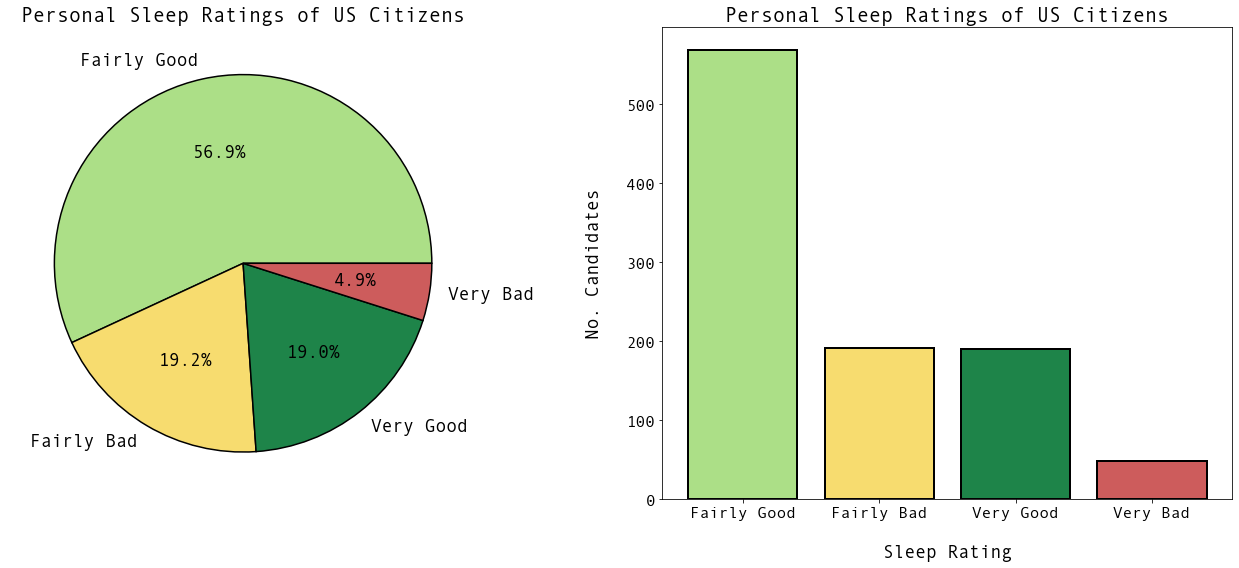

In [5]:
fig, (ax, bx) = plt.subplots(figsize=(18, 8), ncols=2, sharex=False) 

sleep_colors = ('#ACDF87', '#F7DC6F', '#1E8449','#CD5C5C') #colurs to reflect Fairly Good, Fairly Bad, Very Good, Very Bad

sleep_rating = clean_2013Poll['sleep_rating'].value_counts().index #find the unique health ratings
sleep_candidates = clean_2013Poll['sleep_rating'].value_counts() #count the number of occurances of each health ratings

#create pie chart
ax.pie(sleep_candidates,
       labels= sleep_rating,
       autopct='%.1f%%',
       textprops={'fontsize': 18,'fontfamily' : 'Andale Mono'},
       colors = sleep_colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})

ax.set_title('Personal Sleep Ratings of US Citizens',fontsize = 20,fontfamily = 'Andale Mono')

#create bar chart
bx.bar (sleep_rating, sleep_candidates,edgecolor='black', linewidth=2, color = sleep_colors)

bx.set_title('Personal Sleep Ratings of US Citizens',fontsize = 20,fontfamily = 'Andale Mono')

bx.set_xlabel('\nSleep Rating',fontsize = 18,fontfamily = 'Andale Mono') #alter x axis
bx.xaxis.set_tick_params(labelsize=16)
plt.xticks(fontname = 'Andale Mono') 

bx.set_ylabel('No. Candidates\n',fontsize = 18,fontfamily = 'Andale Mono') #alter y axis
bx.yaxis.set_tick_params(labelsize=16)
plt.yticks(fontname = 'Andale Mono') 

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3011_dual_general_sleep_rating.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3011_dual_general_sleep_rating.jpg', dpi=300)

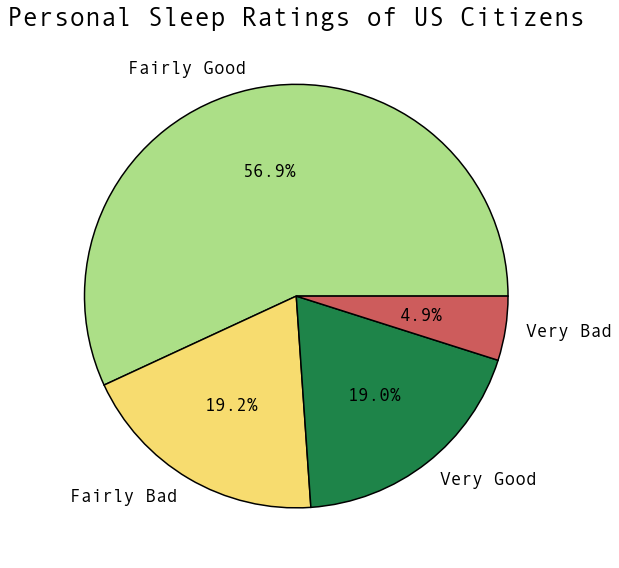

In [6]:
fig, ax= plt.subplots(figsize=(18, 8))

sleep_colors = ('#ACDF87', '#F7DC6F', '#1E8449','#CD5C5C') #colurs to reflect Fairly Good, Fairly Bad, Very Good, Very Bad

sleep_rating = clean_2013Poll['sleep_rating'].value_counts().index #find the unique health ratings
sleep_candidates = clean_2013Poll['sleep_rating'].value_counts() #count the number of occurances of each health ratings

#create pie chart
ax.pie(sleep_candidates, 
       labels= sleep_rating,
       autopct='%.1f%%',
       textprops={'fontsize': 18,'fontfamily' : 'Andale Mono'},
       colors = sleep_colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})

ax.set_title('Personal Sleep Ratings of US Citizens',fontsize = 26,fontfamily = 'Andale Mono')

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3011_general_sleep_rating.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3011_general_sleep_rating.jpg', dpi=300)

## How do Americans Rate Their Health?
We want to take a look at how America's citizens rate their health quality.

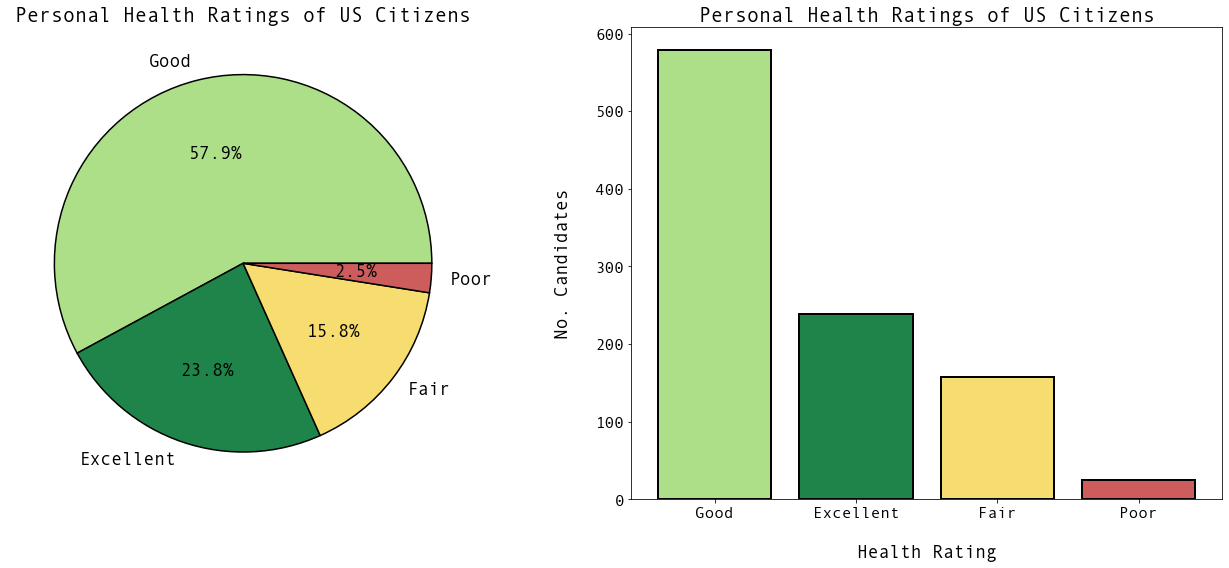

In [7]:
fig, (ax, bx) = plt.subplots(figsize=(18, 8), ncols=2, sharex=False) 

health_colors = ('#ACDF87', '#1E8449', '#F7DC6F','#CD5C5C') #colurs to reflect Good, Excelent, Fair, Poor

health_rating = clean_2013Poll['health_rating'].value_counts().index #find the unique health ratings
health_candidates = clean_2013Poll['health_rating'].value_counts() #count the number of occurances of each health ratings
health_candidates

#create pie chart
ax.pie(health_candidates,
       labels= health_rating,
       autopct='%.1f%%',
       textprops={'fontsize': 18,'fontfamily' : 'Andale Mono'},
       colors = health_colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})

ax.set_title('Personal Health Ratings of US Citizens',fontsize = 20,fontfamily = 'Andale Mono')

#create bar chart
bx.bar (health_rating, health_candidates,edgecolor='black', linewidth=2, color = health_colors)

bx.set_title('Personal Health Ratings of US Citizens',fontsize = 20,fontfamily = 'Andale Mono')

bx.set_xlabel('\nHealth Rating',fontsize = 18,fontfamily = 'Andale Mono') #alter x axis
bx.xaxis.set_tick_params(labelsize=16)
plt.xticks(fontname = 'Andale Mono') 

bx.set_ylabel('No. Candidates\n',fontsize = 18,fontfamily = 'Andale Mono') #alter y axis
bx.yaxis.set_tick_params(labelsize=16)
plt.yticks(fontname = 'Andale Mono') 

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3011_dual_general_health_rating.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3011_dual_general_health_rating.jpg', dpi=300)


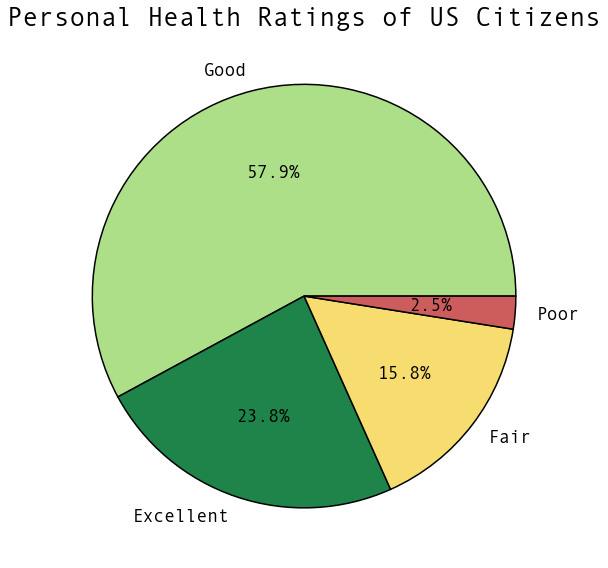

In [8]:
fig,  ax = plt.subplots(figsize=(18, 8))

health_colors = ('#ACDF87', '#1E8449', '#F7DC6F','#CD5C5C') #colurs to reflect Good, Excelent, Fair, Poor

health_rating = clean_2013Poll['health_rating'].value_counts().index #find the unique health ratings
health_candidates = clean_2013Poll['health_rating'].value_counts() #count the number of occurances of each health ratings

#create pie chart
ax.pie(health_candidates, 
       labels= health_rating,
       autopct='%.1f%%',
       textprops={'fontsize': 18,'fontfamily' : 'Andale Mono'},
       colors = health_colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})

ax.set_title('Personal Health Ratings of US Citizens',fontsize = 26,fontfamily = 'Andale Mono')

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3011_general_health_rating.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3011_general_health_rating.jpg', dpi=300)

## How do Americans Rate Their Sleep and Health?

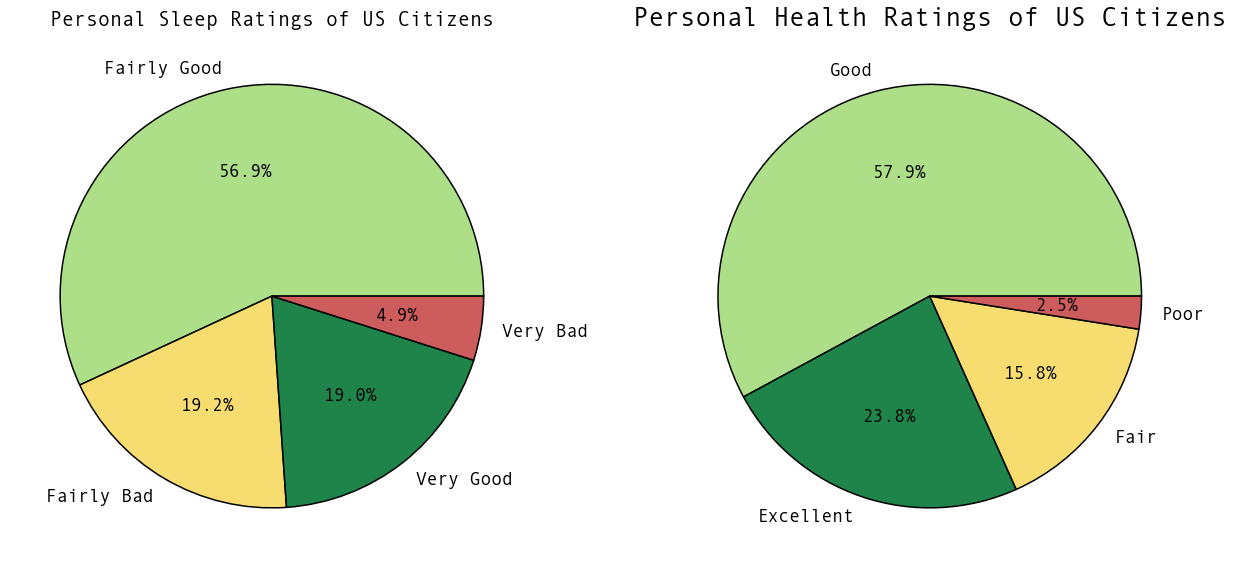

In [9]:
fig, (ax, bx) = plt.subplots(figsize=(18, 8), ncols=2, sharex=False) 
sleep_colors = ('#ACDF87', '#F7DC6F', '#1E8449','#CD5C5C') #colurs to reflect Fairly Good, Fairly Bad, Very Good, Very Bad

health_colors = ('#ACDF87', '#1E8449', '#F7DC6F','#CD5C5C')  #colurs to reflect Fair, Good, Excelent, Poor

sleep_rating = clean_2013Poll['sleep_rating'].value_counts().index #find the unique health ratings
sleep_candidates = clean_2013Poll['sleep_rating'].value_counts() #count the number of occurances of each health ratings

#create pie chart
ax.pie(sleep_candidates,
       labels= sleep_rating,
       autopct='%.1f%%',
       textprops={'fontsize': 18,'fontfamily' : 'Andale Mono'},
       colors = sleep_colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})

ax.set_title('Personal Sleep Ratings of US Citizens',fontsize = 20,fontfamily = 'Andale Mono')

#create bar chart
bx.pie(health_candidates, 
       labels= health_rating,
       autopct='%.1f%%',
       textprops={'fontsize': 18,'fontfamily' : 'Andale Mono'},
       colors = health_colors,
       wedgeprops={"edgecolor":"black",'linewidth': 1.5,'linestyle': 'solid'})

bx.set_title('Personal Health Ratings of US Citizens',fontsize = 26,fontfamily = 'Andale Mono')

plt.tight_layout()

plt.savefig('../data_file/graphs/PNG/3011_dual_pie_general_sleep_rating.png', dpi=300)
plt.savefig('../data_file/graphs/JPG/3011_dual_pie_general_sleep_rating.jpg', dpi=300)

## Findings and Understandings
It's very clear from the graphs above that most Americans would rate their sleep as 'Good' and their health as 'Fairly Good'. In the next notebooks we want to explore how caffeine, tobacco and alcohol influence sleep and health ratings.